# Анализ рынка компьютерных игра

Заказчик: интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Даны данные до 2016 года, планируется на их основе сделать прогноз для кампании в 2017 году. 

## План работы:


- [Описание данных](#1)


- [Предобработка данных](#2):
    - [Работа с регистром](#3)
    - [Работа с типами данных](#4)
    - [Работа с пропусками](#5)
    - [Проверка на неявные дубликаты](#6)
    - [Работа с рейтингами](#7)
    - [Удаление значений](#8)
    - [Проверка вбросов](#9)
    - [Создание нового столбца](#10)


- [Исследовательский анализ данных (EDA)](#11):
    - [Продажи по годам](#12)
    - [Продажи по платформам](#13)
    - [Корреляция между продажами и оценками](#14)
    - [Продажи по жанрам](#15)
    

- [Составление портретов пользователей по регионам](#16):
    - [Продажи по жанрам](#17)
    - [Продажи по платформам](#18)
    - [Продажи по рейтингу ESRB](#19)


- [Проверка статистических гипотез](#20):
    - [Первая гипотеза](#21)
    - [Вторая гипотеза](#22)


- [Вывод](#23)



## Описание данных <a id='1'></a>


- Name — название игры


- Platform — платформа


- Year_of_Release — год выпуска


- Genre — жанр игры


- NA_sales — продажи в Северной Америке (миллионы проданных копий)


- EU_sales — продажи в Европе (миллионы проданных копий)


- JP_sales — продажи в Японии (миллионы проданных копий)


- Other_sales — продажи в других странах (миллионы проданных копий)


- Critic_Score — оценка критиков (максимум 100)


- User_Score — оценка пользователей (максимум 10)


- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.


In [1]:
# Подгружаем необходимые библиотеки

import pandas as pd
import os 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [2]:
# Создаем датафрейм

if os.path.exists(r'C:\Users\abagapov\Downloads\games.csv'):
    df = pd.read_csv(r'C:\Users\abagapov\Downloads\games.csv')
else:
    df = pd.read_csv('/datasets/games.csv')
    
df.name = 'games'

In [3]:
# Создаем функцию для первичного анализа

def first_view(df):
    '''
    Фунция, дающая общее представление о датасете
    '''
    print('Таблица:', df.name)
    print('*'*50)
    print('Общая информация о датасете:')
    print('*'*50)
    df.info('*'*50) 
    print('*'*50)
    print('Пять случайных строк таблицы:')
    display(df.sample(5, random_state=42)) 
    print('*'*50)
    print('Статистические параметры таблицы:')
    display(df.describe())
    print('*'*50)
    print('Количество пустых значений:')
    display(pd.DataFrame(df.isna().sum()).style.background_gradient('coolwarm')) 
    print('*'*50)
    print('Доля пропусков в столбцах:')
    display(pd.DataFrame(df.isna().mean()).style.background_gradient('coolwarm'))
    print('*'*50)
    print('Количество полных дубликатов:')
    print(df.duplicated().sum()) 
    print('*'*50)

## Предобработка данных <a id='2'></a>

In [4]:
first_view(df)

Таблица: games
**************************************************
Общая информация о датасете:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
**************************************************
Пять случайных строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E


**************************************************
Статистические параметры таблицы:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**************************************************
Количество пустых значений:


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


**************************************************
Доля пропусков в столбцах:


,0
Name,0.000120
Platform,0.000000
Year_of_Release,0.016093
Genre,0.000120
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,0.513192
User_Score,0.400897


**************************************************
Количество полных дубликатов:
0
**************************************************


На первый взгляд выявлены слудеющие проблемы: 

- пропуска в столбцах Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating;


- названия столбцов не приведены к нижнему регистру;


- некорректные типы данных в столбце User_Score.



### Работа с регистром <a id='3'></a>

In [5]:
# Приведем названия колонок и данные категориальных столбцов к нижнему регистру 

df.columns = map(str.lower, df.columns)

for i in ['name', 'platform', 'genre', 'rating']:
    df[i] = df[i].str.lower()

In [6]:
# Проверим

df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e


### Работа с типами данных <a id='4'></a>

In [7]:
df['user_score'].replace('tbd', 0, inplace=True)

df['user_score'] = df['user_score'].astype('float32')

В колонке 'user_score' существует значение 'tbd' - оценка еще не определена. Заменим данное значение и пропуски на 0.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


In [9]:
# Проверим, осталось ли значение 'tbd' в столбце user_score

df['user_score'].isin(['tbd']).sum()

0

In [10]:
# Проверим, заполнились ли пропуски в столбцах critic_score

df['critic_score'].isna().sum()

8578

In [11]:
# Проверим, заполнились ли пропуски в столбце user_score

df['user_score'].isna().sum()

6701

### Работы с пропусками <a id='5'></a>

1. В столбцах critic_score, user_score и rating объем пропусков слишком велик, чтобы их заменять чем-то осмысленным или удалять. Возможно, без оценок и рейтинга остаются различные инди-игры. Но, учитывая обилие пропусков, пропуски могут быть связаны и с проблемами при выгрузке данных, и с отсутствием ресурса на сбор полной информации. Заменим отсутствующие значения critic_score и user_score на 0, rating на 'w/o_raiting'.

In [12]:
len(df.query('critic_score.isna() & user_score.isna() & rating.isna()'))

6621

В подавляющем большинстве случаев пропуски находятся в трех столбцах одновременно.

In [13]:
# Заменим отсутсвующие значения в данных столбцах на 0

df['critic_score'].fillna(0, inplace=True)

df['user_score'].fillna(0, inplace=True)
        
df['rating'].fillna('w/o_rating', inplace=True)

2. В столбцах Name и Genre по 2 пропуска. Проверим, относятся ли они к одним и тем же строкам.

In [14]:
len(df.query('name.isna() & genre.isna()'))

2

Да, данные пропуски находятся в одних строках. Их будем удалять.

3. В столбце Year_of_Release 269 пропусков, 1.6% от общего объема данных, поэтому их также можно удалить.

In [15]:
df['rating'].value_counts()

w/o_rating    6766
e             3990
t             2961
m             1563
e10+          1420
ec               8
k-a              3
rp               3
ao               1
Name: rating, dtype: int64

### Проверка на неявные дубликаты <a id='6'></a>

In [16]:
# Посмотим на уникальные значения столбца rating

df['rating'].unique()

array(['e', 'w/o_rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [17]:
# Посмотим на уникальные значения столбца platform

df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [18]:
# Посмотим на уникальные значения столбца genre

df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [19]:
# Посмотрим, есть ли дубликаты в столбцах по имени и платформе

df.duplicated(subset=['name','platform']).sum()

5

In [20]:
df[df.duplicated(subset=['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,need for speed: most wanted,x360,2005.0,racing,1.0,0.13,0.02,0.10,83.0,8.5,t
4127,sonic the hedgehog,ps3,NaN,platform,0.0,0.48,0.00,0.00,43.0,4.1,e10+
11715,need for speed: most wanted,pc,2012.0,racing,0.0,0.06,0.00,0.02,82.0,8.5,t
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.00,0.0,0.0,w/o_rating
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.00,83.0,5.5,e


Существует три неявных дубликата, удалим им позже

### Работы с рейтингами <a id='7'></a>

In [21]:
# Посмотрим, как распределены игры по рейтингам

df['rating'].value_counts()

w/o_rating    6766
e             3990
t             2961
m             1563
e10+          1420
ec               8
k-a              3
rp               3
ao               1
Name: rating, dtype: int64

In [22]:
df[df['rating'] == 'ao']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,grand theft auto: san andreas,xb,2005.0,action,1.26,0.61,0.0,0.09,93.0,8.6,ao


1. Рейтинг 'rp' ('ожидается') заменим на 'w/o_rating'

In [23]:
df['rating'].replace('rp', 'w/o_raiting', inplace=True)

2. Рейтинг 'oa' ('только взрослые') заменим на 'm' ('взрослые)

In [24]:
df['rating'].replace('ao', 'm', inplace=True)

3. Рейтинг 'k-a' (утаревшее название) заменим на 'e' 

In [25]:
df['rating'].replace('k-a', 'e', inplace=True)

In [26]:
# Посмотрим, как распределены жанры по рейтингам 

pd.pivot_table(df, index='rating', columns='genre', values='name', aggfunc='count')

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
rating,,,,,,,,,,,,
e,416.0,162.0,8.0,458.0,358.0,289.0,585.0,84.0,48.0,325.0,1188.0,72.0
e10+,481.0,68.0,19.0,167.0,144.0,43.0,96.0,111.0,58.0,48.0,107.0,78.0
ec,1.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m,609.0,99.0,49.0,13.0,3.0,NaN,18.0,162.0,565.0,5.0,16.0,25.0
t,681.0,115.0,362.0,239.0,64.0,10.0,172.0,420.0,348.0,190.0,198.0,162.0
w/o_raiting,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0
w/o_rating,1181.0,857.0,411.0,868.0,319.0,238.0,377.0,721.0,304.0,305.0,839.0,344.0


### Удаление значений <a id='8'></a>

In [27]:
# Удалим строки с пустым значением с годом выпуска

df.dropna(subset=['year_of_release'], inplace=True) 

In [28]:
# Удалим строки с пустым значением с жанром

df.dropna(subset=['genre'], inplace=True) 

In [29]:
# Посмотрим на строки с неявными дубликатами

df[df[['name','platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


In [30]:
# Удалим строки с неявными дубликатами

df.drop_duplicates(subset=['name','platform', 'year_of_release'], inplace=True)

In [31]:
# Проверим

df.duplicated(subset=['name','platform']).sum()

2

### Проверка выбросов <a id='9'></a>

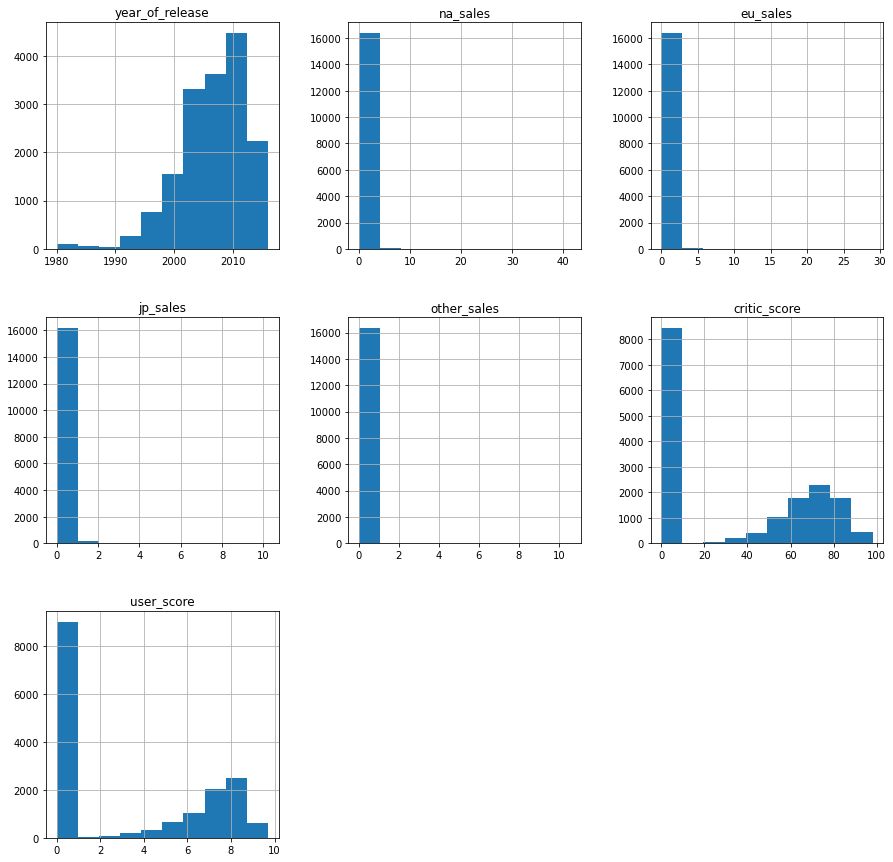

In [32]:
# Построим общую гистограмму

df.hist(figsize=(15,15));

По всей видимости, существуют выбросы в столбцах с количеством проданных копий. Посмотрим на боксплоты.

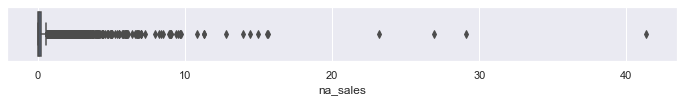

na_sales


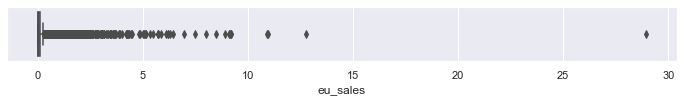

eu_sales


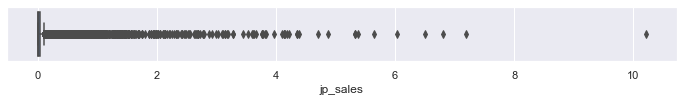

jp_sales


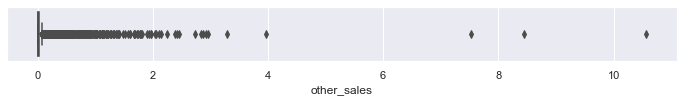

other_sales


In [33]:
sns.set(rc={'figure.figsize':(12, 1)})

for column in df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]:
    try:
        sns.boxplot(df[column])
        plt.show()
        print(column)
    except:
        pass

sns.set(rc={'figure.figsize':(12, 8)})    
    

Выбросы существуют и могут указывать на актуальность конкретных игр, жанров и платформ.

### Создание нового столбца <a id='10'></a>

In [34]:
# Создадим столбец с суммарными продажами

df['overall_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,0.0,0.0,w/o_rating,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,w/o_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,0.0,0.0,w/o_rating,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,0.0,w/o_rating,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,0.0,w/o_rating,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,0.0,0.0,w/o_rating,0.01


## Исследовательский анализ данных (EDA) <a id='11'></a>

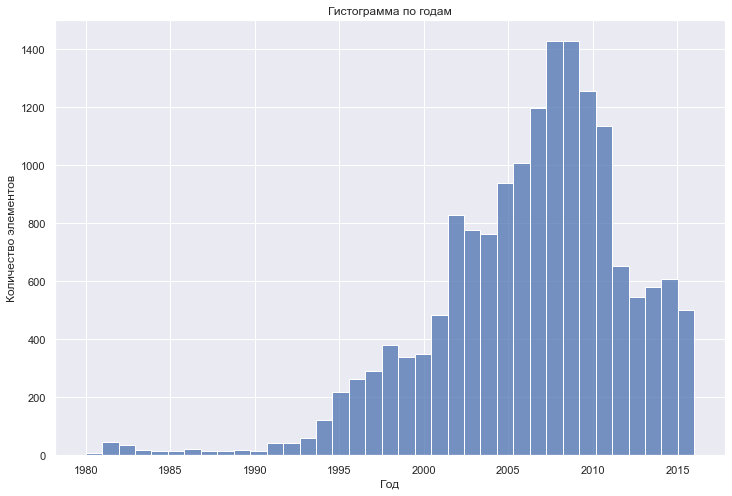

In [35]:
# Посмотрим повнимательнее на года продажи

sns.set(rc={'figure.figsize':(12, 8)})

ax = sns.histplot(df['year_of_release'], bins=37);

ax.set_title('Гистограмма по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество элементов')
plt.show();

Наблюдается стремительный рост выпуска игр с 1990 по 2010 год, далее резкое падение (связанное, вероятно, с кризисом 2008 года) и некоторая стабилизация до 2016 года.

### Продажи по годам <a id='12'></a>

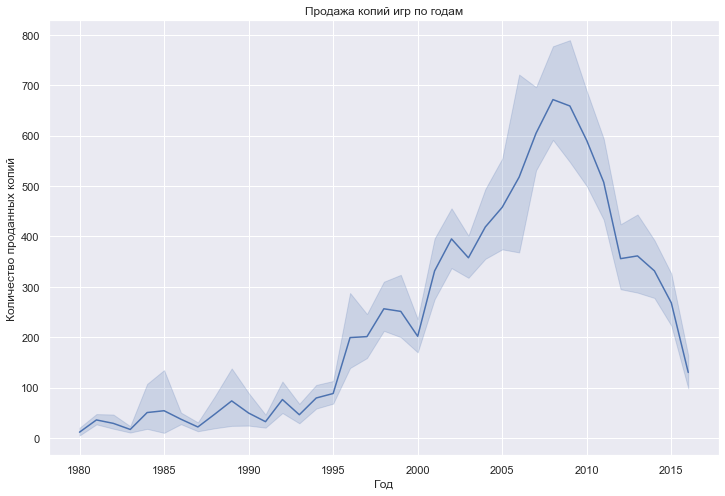

In [36]:
# Изобразим продажи по годам на графике

ax = sns.lineplot(data=df, x='year_of_release', estimator='sum', y='overall_sales')
ax.set_title('Продажа копий игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий')
plt.show();

График суммарных продаж по годам, в целом, соответствует графику по выпущенным играм. 

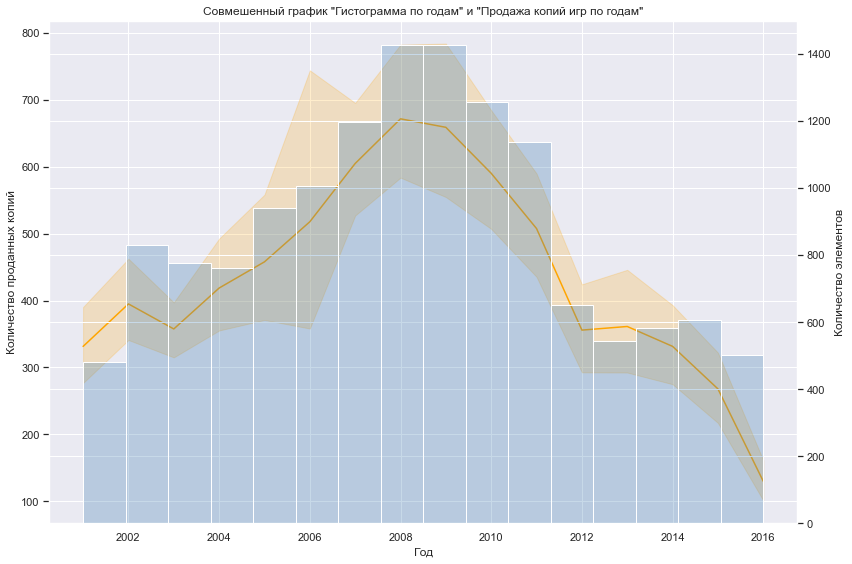

In [37]:
# Посмотрим на срез после 2000 года

fig, ax = plt.subplots()
sns.lineplot(data=df.query('year_of_release > 2000'), x='year_of_release', y='overall_sales', estimator='sum', 
             color='orange', ax=ax)
ax2 = ax.twinx()
sns.histplot(data=df.query('year_of_release > 2000')['year_of_release'], color='steelblue', bins=16, 
             alpha=0.3, ax=ax2)
ax.set_title('Совмешенный график "Гистограмма по годам" и "Продажа копий игр по годам"')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий')
ax2.set_ylabel('Количество элементов')
plt.tight_layout()
plt.show()

С 2013 года наблюдается падение продаж при стабилизации количества выпущенных игр. Посмотрим, есть ли разница по регионам.

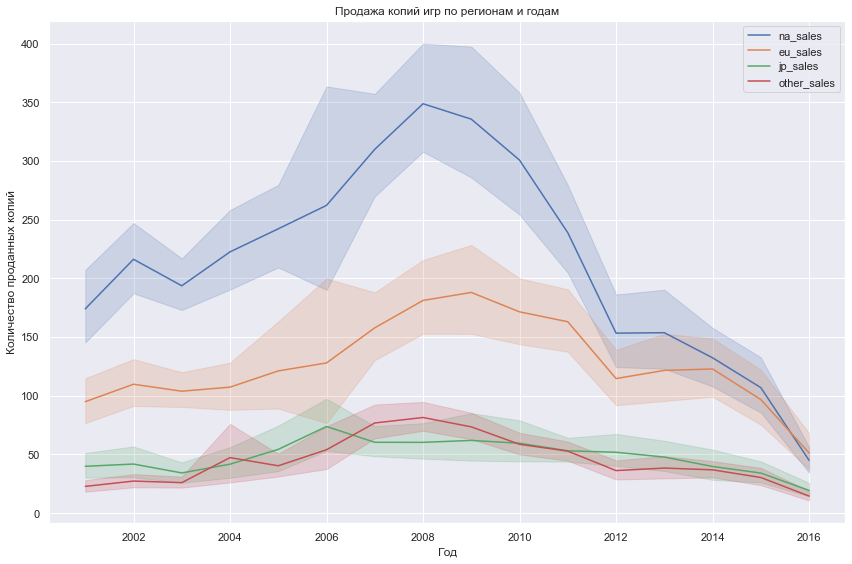

In [38]:
fig, ax = plt.subplots()
sns.lineplot(data=df.query('year_of_release > 2000'), x='year_of_release', y='na_sales', 
             ax=ax, estimator='sum', label='na_sales')
sns.lineplot(data=df.query('year_of_release > 2000'), x='year_of_release', y='eu_sales', 
             ax=ax, estimator='sum', label='eu_sales')
sns.lineplot(data=df.query('year_of_release > 2000'), x='year_of_release', y='jp_sales', 
             ax=ax, estimator='sum', label='jp_sales')
sns.lineplot(data=df.query('year_of_release > 2000'), x='year_of_release', y='other_sales', 
             ax=ax, estimator='sum', label='other_sales')
ax.set_title('Продажа копий игр по регионам и годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий')
ax.legend()
plt.tight_layout()
plt.show()

Так или иначе, все регионы показывают падение с 2013 или 2014 по 2015 года, наиболее резкое в NA и EU.

### Продажи по платформам <a id='13'></a>

In [39]:
# Посмотрим на суммарные продажи по платформам

df.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending=False).head(15).reset_index()

,platform,overall_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


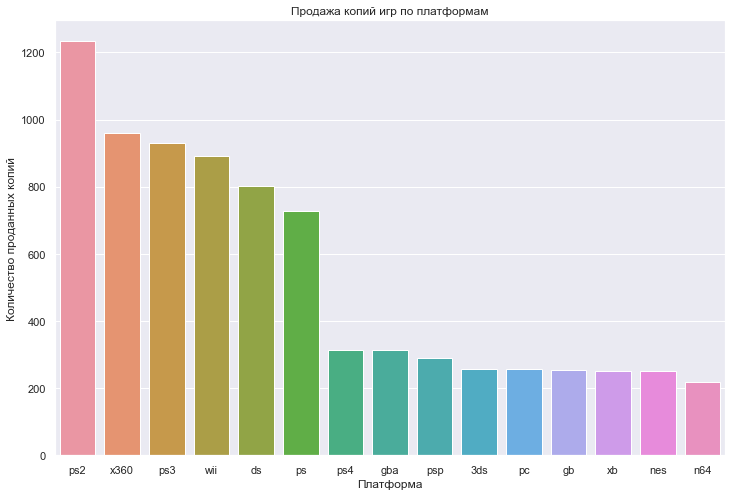

In [40]:
# Изобразим на графике

ax = sns.barplot(data=df.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending=False).head(15)
                 .reset_index(), x='platform', y='overall_sales');

ax.set_title('Продажа копий игр по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.show();

В первую пятерку входит сразу три приставки PS, а также X360, Wii и DS.

In [41]:
# Сохраним топ-15 платформ за все время как список

pop_platform_list = df.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending=False).head(15).index

In [42]:
pop_platform_list

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds',
       'pc', 'gb', 'xb', 'nes', 'n64'],
      dtype='object', name='platform')

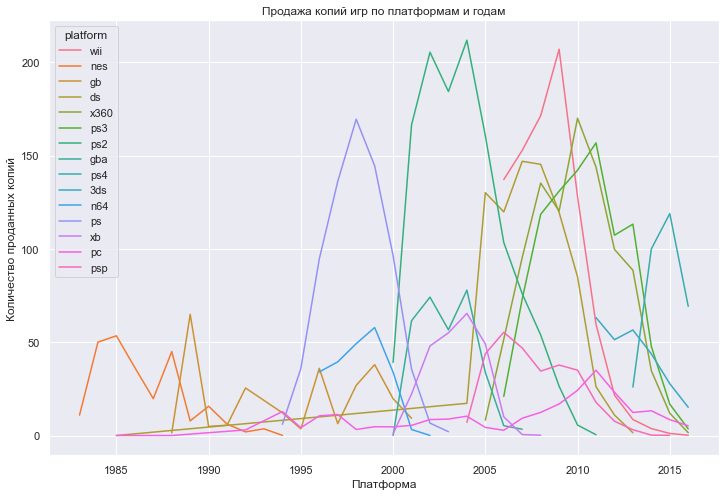

In [43]:
# Построим график по платформам и годам

ax = sns.lineplot(data=df[df['platform'].isin(pop_platform_list)], 
             x='year_of_release', y='overall_sales', hue='platform', estimator='sum', ci=None);

ax.set_title('Продажа копий игр по платформам и годам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.show();

In [44]:
# Посмотрим на самые раннее игры платформы DS 

df[df['platform'] == 'ds'].sort_values('year_of_release').head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
15957,strongest tokyo university shogi ds,ds,1985.0,action,0.00,0.0,0.02,0.0,0.0,0.0,w/o_rating,0.02
13463,cocoto kart racer,ds,2004.0,racing,0.04,0.0,0.00,0.0,0.0,0.0,e,0.04


In [45]:
# Так как DS вышла в 2004, удалим строку со значением года 1985

df.drop(index=[15957], inplace=True)

In [46]:
# Посмотрим на длительность жизни платформ

platform_year = df.groupby('platform').agg({'year_of_release':['min','max']})

platform_year['diff'] = platform_year['year_of_release', 'max'] - platform_year['year_of_release', 'min']

platform_year['diff'].sort_values(ascending=False)

platform
pc      31.0
gb      13.0
nes     11.0
x360    11.0
psp     11.0
ps2     11.0
dc      10.0
wii     10.0
ps3     10.0
2600     9.0
snes     9.0
ps       9.0
ds       9.0
xb       8.0
gba      7.0
gc       6.0
n64      6.0
sat      5.0
3ds      5.0
psv      5.0
wiiu     4.0
gen      4.0
ng       3.0
ps4      3.0
xone     3.0
ws       2.0
scd      1.0
3do      1.0
tg16     0.0
gg       0.0
pcfx     0.0
Name: diff, dtype: float64

Долгожителем можно считать PC. Остальные же платформы около 5-10 лет. К 2016 году уже практически не видно PS, PS2, DS, XB.

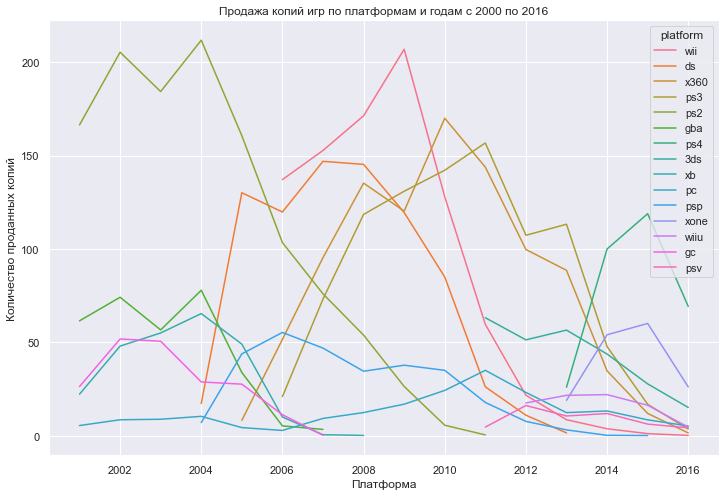

In [47]:
# Посмотрим повнимательнее на перид с 2000 года

pop_platform_list = (
    df.query('year_of_release > 2000').groupby('platform')['overall_sales']
    .agg('sum').sort_values(ascending=False).head(15).index
                    )

ax = sns.lineplot(data=df
             .query('year_of_release > 2000')[df['platform']
             .isin(pop_platform_list)], x='year_of_release', y='overall_sales', hue='platform', estimator='sum', ci=None);

ax.set_title('Продажа копий игр по платформам и годам c 2000 по 2016')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.show();
    

Как и на предыдущих графиках, виден пик продаж в 2013 году (а также в в 2015 для новых платформ ps4 и XOne), после которого идет постепенное падение или стабилизация. Так как данные в 2016 году неполные, нельзя быть уверенным, что в 2016 падение продолжилось.

In [48]:
# Создадим датафрейм, обрезав первичный до 2014 года

df_final = df.query('year_of_release >= 2014')

In [49]:
# Посмотрим информацию об итоговом датафрейме

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float32
 10  rating           1689 non-null   object 
 11  overall_sales    1689 non-null   float64
dtypes: float32(1), float64(7), object(4)
memory usage: 164.9+ KB


In [50]:
# Посмотрим на количество игр по платформам

df_final['platform'].value_counts()

ps4     376
psv     295
xone    228
ps3     219
3ds     212
pc      151
x360    111
wiiu     73
psp      13
wii      11
Name: platform, dtype: int64

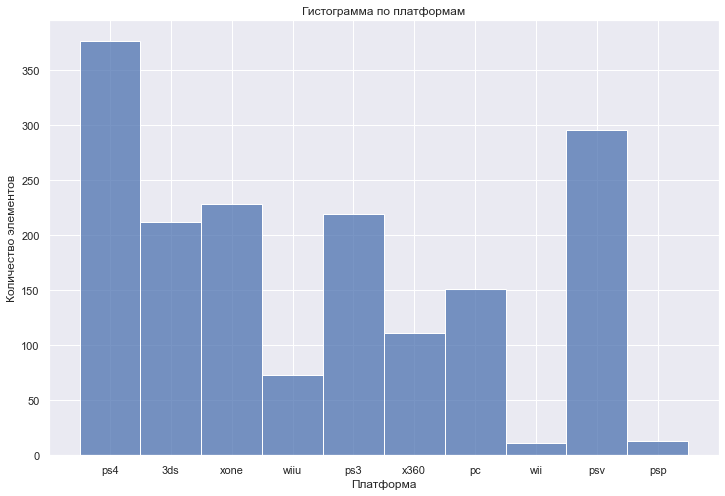

In [51]:
# Изобразим на гистограмме

ax = sns.histplot(df_final['platform']);

ax.set_title('Гистограмма по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество элементов')
plt.show();

Больше всего игр выпускается на платформах PS4, XOne и PSV.

In [52]:
# Еще раз посмотрим на суммарные продажи по платформам

df_final.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending=False)

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: overall_sales, dtype: float64

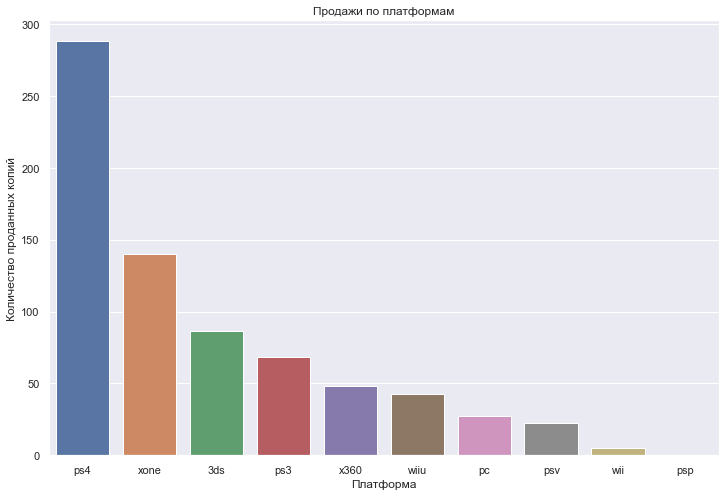

In [53]:
# Покажем на графике

ax = sns.barplot(data=df_final.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending=False).head(15)
            .reset_index(),
            x='platform', y='overall_sales');

ax.set_title('Продажи по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.show();


Наиболее продаваемы игры на PS4, XOne, 3DS и PS3. При этом новыми платформами являются лишь первые две.

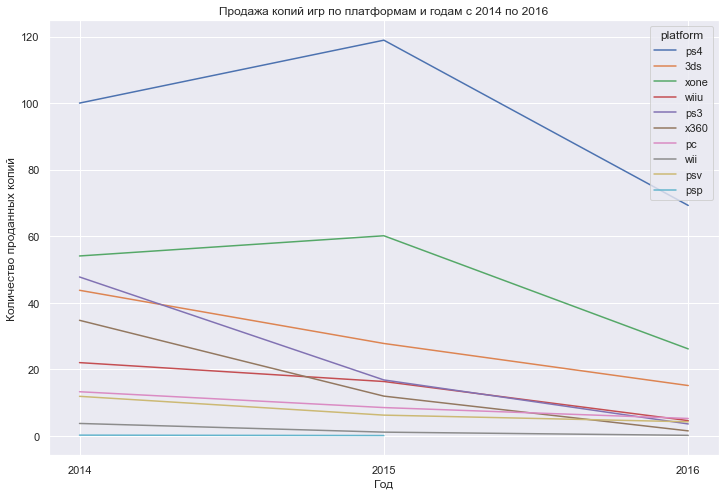

In [54]:
# Посмотрим, как распределяются продажи по платформам в отрезке времени

ax = sns.lineplot(data=df_final, x='year_of_release', y='overall_sales', estimator='sum', hue='platform', ci=None);

ax.set_title('Продажа копий игр по платформам и годам c 2014 по 2016')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий')
ax.set_xticks(range(2014,2017))
plt.show();


C 2014 по 2015 годы показывают рост продаж лишь новые платформы PS4 и XOne. Они и являются наиболее перспективными. Кроме того, вряд ли потеряет популярность PC. Также следует обратить внимание на портативные устройства 3DS и PSV.

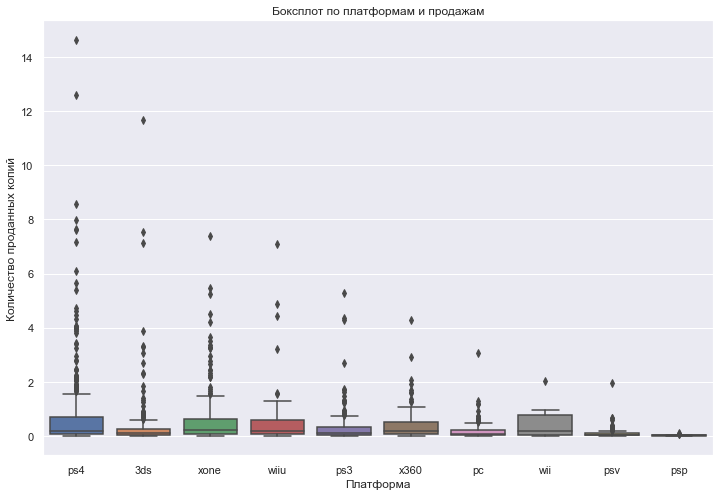

In [55]:
# Пострим боксплот для платформ

ax = sns.boxplot(data=df_final, x='platform', y='overall_sales');

ax.set_title('Боксплот по платформам и продажам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.show();


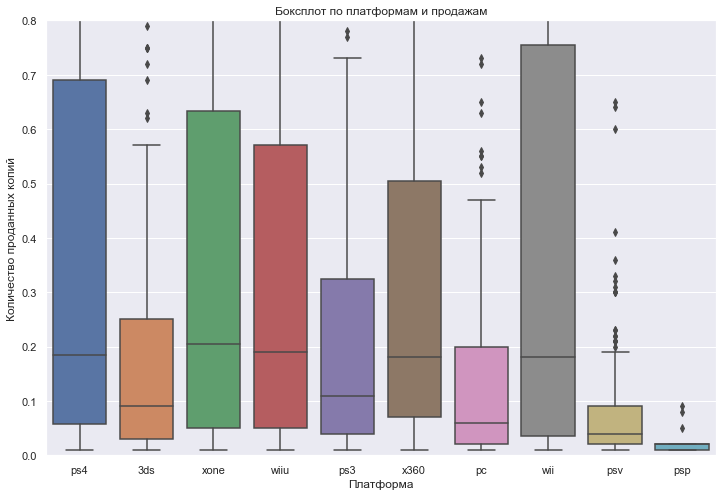

In [56]:
# Пострим боксплот для платформ с ограничением по оси y

ax = sns.boxplot(data=df_final, x='platform', y='overall_sales');

ax.set_title('Боксплот по платформам и продажам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий')
plt.ylim(0, 0.8)
plt.show();


PS4, 3DS и XOne показывают стабильно большое число значительных выбросов по продажам, по медианным данным лидируют XOne, WiiU и PS4.

### Корреляция между продажами и оценками <a id='14'></a>

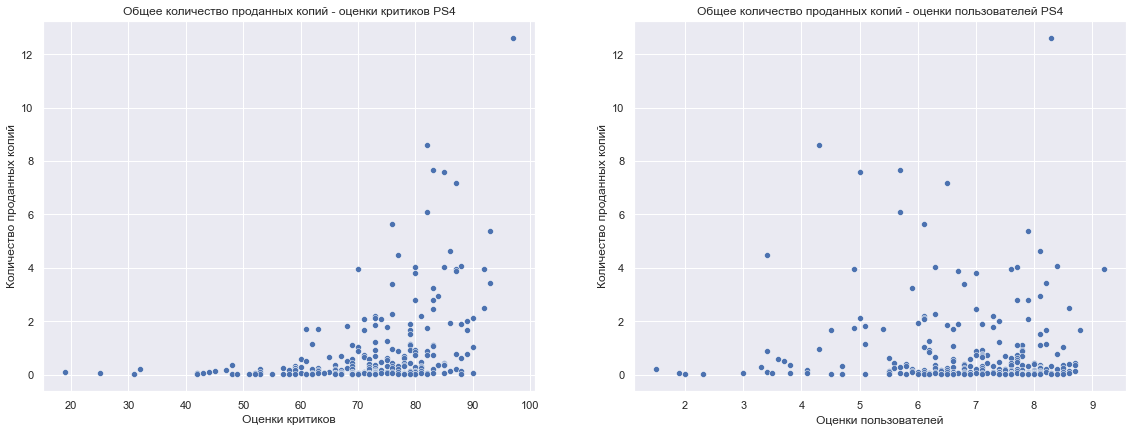

In [57]:
# На примере PS4 посмотрим, как влияют на продажи оценки критиков и пользователей

plt.figure(figsize=(30, 15))
ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(data=df_final.query('platform == "ps4" and critic_score != 0'), 
                x='critic_score', y='overall_sales', ax=ax1);
ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(data=df_final.query('platform == "ps4" and user_score != 0'), 
                x='user_score', y='overall_sales', ax=ax2);
ax1.set_title('Общее количество проданных копий - оценки критиков PS4')
ax2.set_title('Общее количество проданных копий - оценки пользователей PS4')
ax1.set_xlabel('Оценки критиков')
ax2.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Количество проданных копий')
ax2.set_ylabel('Количество проданных копий')
plt.show()

Нельзя сказать, что существует хотя бы средняя линейная зависимость между продажами оценками. Однако, игры с самыми высокими продажами имеют также и самые высокие оценки (от 5 до 10 у пользователей и от 70 до 100 у критиков). Это довольно логично - люди скорее купят хорошую игру, чем плохую, поэтому будем исходить из того, что данное правило работает для всех платформ.

In [58]:
# Для сравнения посчитаем корреляцию для PS4

(
df_final.query('platform == "ps4" and critic_score != 0')
    [['overall_sales', 'critic_score']] 
.corr().style.background_gradient('coolwarm').format({'ratio': '{:,.2%}'.format}, precision=2)
)

,overall_sales,critic_score
overall_sales,1.00,0.40
critic_score,0.40,1.00


In [59]:
# Для сравнения посчитаем корреляцию для PS4

(
df_final.query('platform == "ps4" and user_score != 0')
    [['overall_sales', 'user_score']] 
.corr().style.background_gradient('coolwarm').format({'ratio': '{:,.2%}'.format}, precision=2)
)

,overall_sales,user_score
overall_sales,1.00,-0.04
user_score,-0.04,1.00


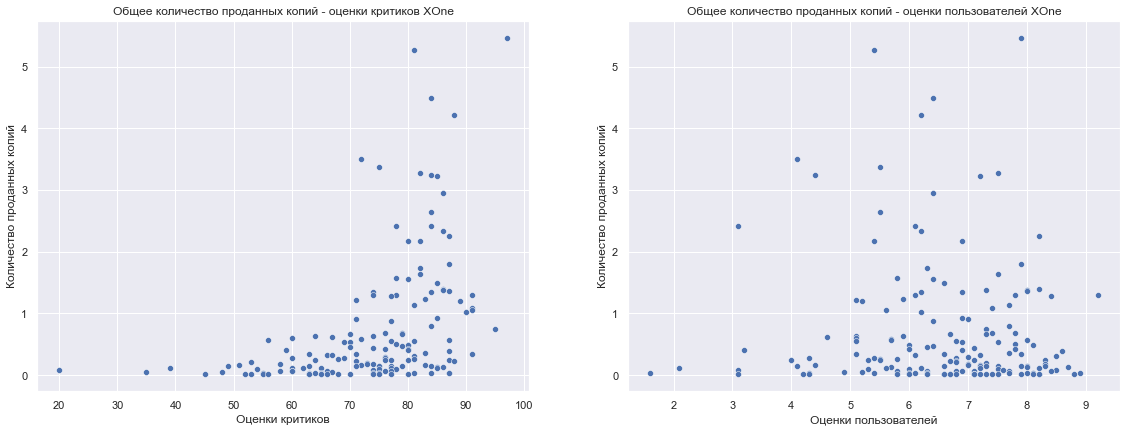

In [60]:
# На примере XOne посмотрим, как влияют на продажи оценки критиков и пользователей

plt.figure(figsize=(30, 15))
ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(data=df_final.query('platform == "xone" and critic_score != 0'), 
                x='critic_score', y='overall_sales', ax=ax1);
ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(data=df_final.query('platform == "xone" and user_score != 0'), 
                x='user_score', y='overall_sales', ax=ax2);
ax1.set_title('Общее количество проданных копий - оценки критиков XOne')
ax2.set_title('Общее количество проданных копий - оценки пользователей XOne')
ax1.set_xlabel('Оценки критиков')
ax2.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Количество проданных копий')
ax2.set_ylabel('Количество проданных копий')
plt.show()

In [61]:
# Для сравнения посчитаем корреляцию для второй новой платформы - XOne

(
df_final.query('platform == "xone" and critic_score != 0 ')
    [['overall_sales', 'critic_score']] 
.corr().style.background_gradient('coolwarm').format({'ratio': '{:,.2%}'.format}, precision=2)
)

,overall_sales,critic_score
overall_sales,1.00,0.43
critic_score,0.43,1.00


In [62]:
# Для сравнения посчитаем корреляцию для второй новой платформы - XOne

(
df_final.query('platform == "xone" and user_score != 0')
    [['overall_sales', 'user_score']] 
.corr().style.background_gradient('coolwarm').format({'ratio': '{:,.2%}'.format}, precision=2)
)

,overall_sales,user_score
overall_sales,1.00,-0.07
user_score,-0.07,1.00


Корреляции примерно такие же.

### Продажи по жанрам <a id='15'></a>

In [63]:
# Посмотрим на количество игр по жанраам

df_final['genre'].value_counts()

action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

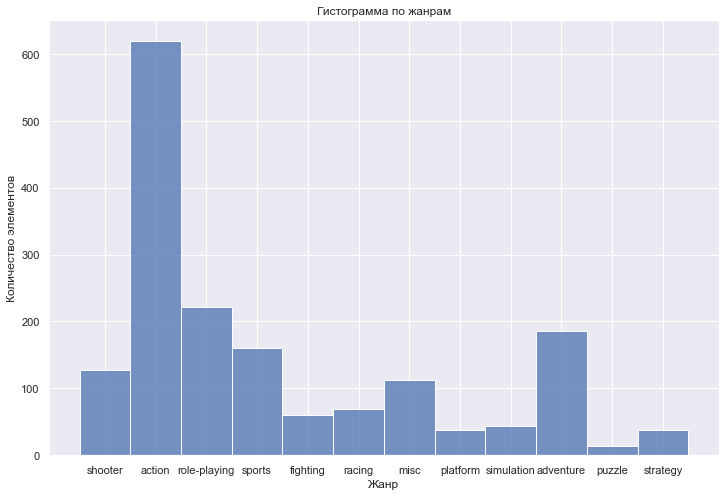

In [64]:
# Построим гистограмму по жанрам

ax = sns.histplot(df_final['genre']);

ax.set_title('Гистограмма по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество элементов')
plt.show();

Наиболее популярен action, много менее - role-playing, adventure и sports.

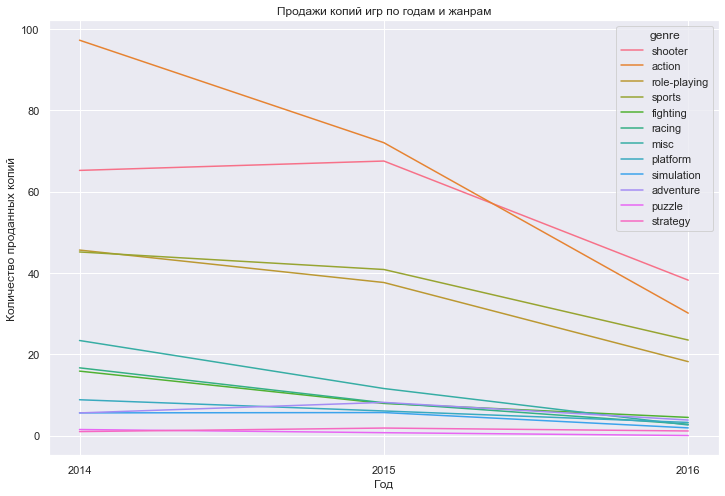

In [65]:
# Посмотрим на продажи в разбивке по жанрам

ax = sns.lineplot(data=df_final, x='year_of_release', y='overall_sales', estimator='sum', hue='genre', ci=None);

ax.set_title('Продажи копий игр по годам и жанрам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий')
ax.set_xticks(range(2014,2017))
plt.show();

Падение с 2014 по 2015 годы происходит во всех жанрах, кроме Shooter (самый большой рост), Adventure и Strategy. Наиболее резкое падение показал Action.

In [66]:
# Посмотрим на суммарные продажи по жанрам

df_final.groupby('genre')['overall_sales'].agg('sum').sort_values(ascending=False)

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: overall_sales, dtype: float64

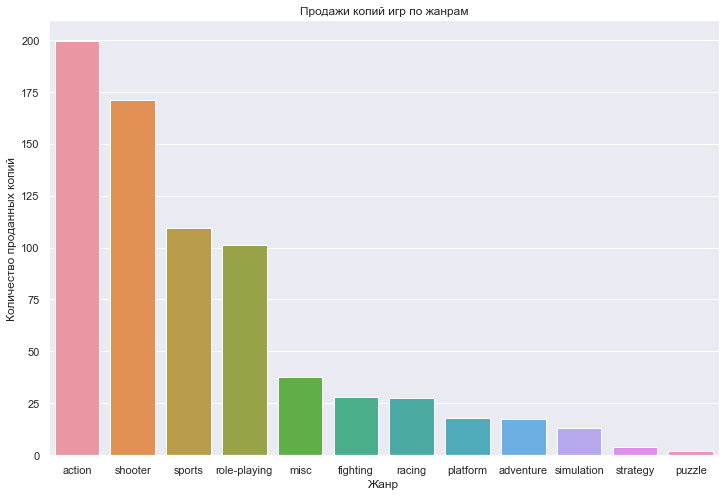

In [67]:
# Покажем на графике

ax = sns.barplot(data=df_final.groupby('genre')['overall_sales'].agg('sum').sort_values(ascending=False).head(15)
                 .reset_index(), x='genre', y='overall_sales');

ax.set_title('Продажи копий игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество проданных копий')
plt.show();

Наиболее продающиеся жанры - action, shooter, sports и role-playing, наименее - Puzzle, Strategy и Simulation.

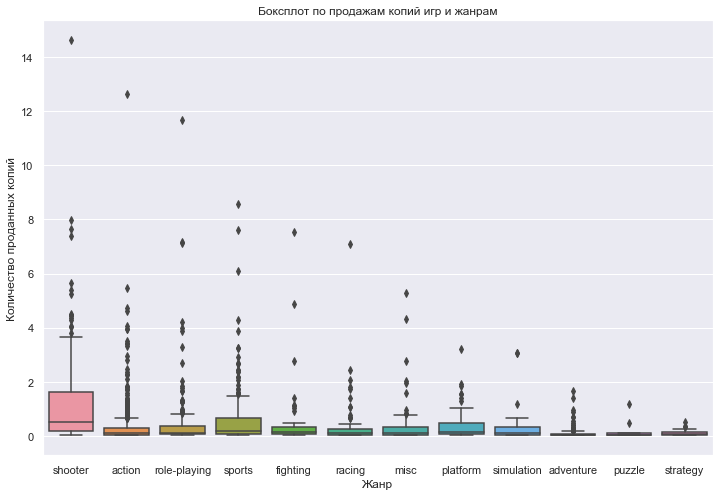

In [68]:
# Пострим боксплот для жанров

ax = sns.boxplot(data=df_final, x='genre', y='overall_sales');

ax.set_title('Боксплот по продажам копий игр и жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество проданных копий')
plt.show();

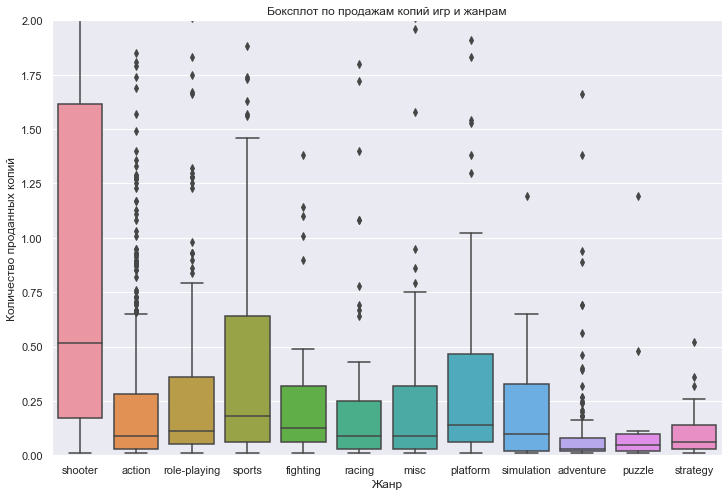

In [69]:
# Пострим боксплот для жанров с ограничением по оси у

ax = sns.boxplot(data=df_final, x='genre', y='overall_sales');

ax.set_title('Боксплот по продажам копий игр и жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество проданных копий')
plt.ylim(0, 2)
plt.show();

Наибольшие выбросы по количеству проданных копий показали Action, Shooter и Role-playing. По медианному лидируют Shooter, Sports и Platform. 

## Портреты пользователей по регионам <a id='16'></a>

In [70]:
# Создадим датафреймы с пользователями по регионам, удалив отсутствующие и нулевые значения проданных копий

df_na = df_final.drop(columns=['eu_sales', 'jp_sales', 'other_sales', 'overall_sales']).query('na_sales > 0')

df_jp = df_final.drop(columns=['na_sales', 'eu_sales', 'other_sales', 'overall_sales']).query('jp_sales > 0')

df_eu = df_final.drop(columns=['na_sales', 'jp_sales', 'other_sales', 'overall_sales']).query('eu_sales > 0')

### Продажи по платформам <a id='17'></a>

In [71]:
# Продажи по платформам в NA

df_na_platform = df_na.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_na_platform.loc[len(df_na_platform.index)] = ['other', df_na.groupby('platform')['na_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['na_sales']
                                                 .sum().round()]

df_na_platform['ratio'] = round(df_na_platform['na_sales'] / df_na_platform['na_sales'].sum(), 2)

df_na_platform

,platform,na_sales,ratio
0,ps4,98.61,0.35
1,xone,81.27,0.29
2,x360,28.30,0.10
3,3ds,22.64,0.08
4,ps3,22.05,0.08
5,other,31.00,0.11


In [72]:
# Продажи по платформам в EU

df_eu_platform = df_eu.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_eu_platform.loc[len(df_eu_platform.index)] = ['other', df_eu.groupby('platform')['eu_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['eu_sales']
                                                 .sum().round()]

df_eu_platform['ratio'] = round(df_eu_platform['eu_sales'] / df_eu_platform['eu_sales'].sum(), 2)

df_eu_platform

,platform,eu_sales,ratio
0,ps4,130.04,0.48
1,xone,46.25,0.17
2,ps3,25.54,0.09
3,pc,17.97,0.07
4,3ds,16.12,0.06
5,other,35.00,0.13


In [73]:
# Продажи по платформам в JP

df_jp_platform = df_jp.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_jp_platform.loc[len(df_jp_platform.index)] = ['other', df_jp.groupby('platform')['jp_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['jp_sales']
                                                 .sum().round()]

df_jp_platform['ratio'] = round(df_jp_platform['jp_sales'] / df_jp_platform['jp_sales'].sum(), 2)


df_jp_platform

,platform,jp_sales,ratio
0,3ds,44.24,0.47
1,ps4,15.02,0.16
2,psv,14.54,0.16
3,ps3,11.22,0.12
4,wiiu,7.31,0.08
5,other,1.00,0.01


Регионы EU и NA объединяет интерес к платформам PS4, XOne, и PS3. Только в NA популярнее XOne, а в EU PS4. В JP же самая популярная приставка 3DS, на втором месте PS4, XOne не представлена вовсе.

Отсутствие XOne в топе-5 можно объяснить тем, что JP патриотично отдает предпочтение PlayStation, произведенной японской компанией. Все оставшиеся приставки в JP также принадлежат японским компаниям.

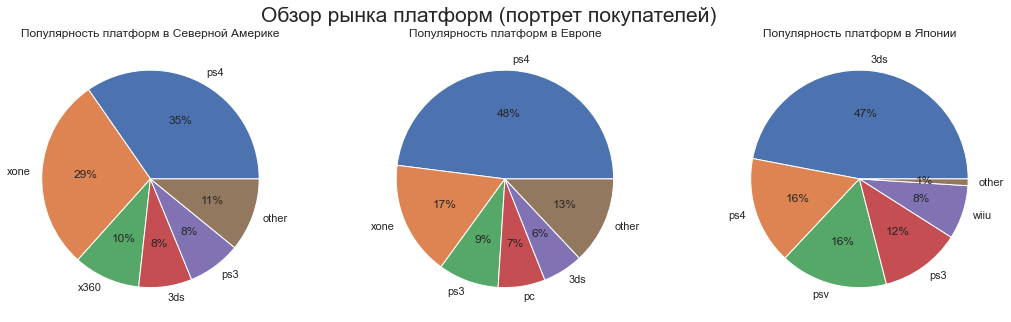

In [74]:
# Изобразим на графике

fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Обзор рынка платформ (портрет покупателей)', fontsize=21)
axes[0].pie(data=df_na_platform, x='ratio', labels = 'platform', autopct='%.0f%%')
axes[1].pie(data=df_eu_platform, x='ratio', labels = 'platform',  autopct='%.0f%%')
axes[2].pie(data=df_jp_platform, x='ratio', labels = 'platform',  autopct='%.0f%%')
axes[0].set_title('Популярность платформ в Северной Америке')
axes[1].set_title('Популярность платформ в Европе')
axes[2].set_title('Популярность платформ в Японии')
plt.show()

### Продажи по жанрам <a id='18'></a>

In [75]:
# Продажи по жанрам в NA

df_na_genre = df_na.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_na_genre.loc[len(df_na_genre.index)] = ['other', df_na.groupby('genre')['na_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['na_sales']
                                                 .sum().round()]

df_na_genre['ratio'] = round(df_na_genre['na_sales'] / df_na_genre['na_sales'].sum(), 2)

df_na_genre

,genre,na_sales,ratio
0,shooter,79.02,0.28
1,action,72.53,0.26
2,sports,46.13,0.16
3,role-playing,33.47,0.12
4,misc,15.05,0.05
5,other,38.00,0.13


In [76]:
# Продажи по жанрам в EU

df_eu_genre = df_eu.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_eu_genre.loc[len(df_eu_genre.index)] = ['other', df_eu.groupby('genre')['eu_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['eu_sales']
                                                 .sum().round()]

df_eu_genre['ratio'] = round(df_eu_genre['eu_sales'] / df_eu_genre['eu_sales'].sum(), 2)

df_eu_genre

,genre,eu_sales,ratio
0,action,74.68,0.28
1,shooter,65.52,0.24
2,sports,45.73,0.17
3,role-playing,28.17,0.10
4,racing,14.13,0.05
5,other,42.00,0.16


In [77]:
# Продажи по жанрам в JP

df_jp_genre = df_jp.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_jp_genre.loc[len(df_jp_genre.index)] = ['other', df_jp.groupby('genre')['jp_sales'].agg('sum')
                                                 .sort_values(ascending=False).reset_index().loc[5:]['jp_sales']
                                                 .sum().round()]

df_jp_genre['ratio'] = round(df_jp_genre['jp_sales'] / df_jp_genre['jp_sales'].sum(), 2)

df_jp_genre

,genre,jp_sales,ratio
0,role-playing,31.16,0.33
1,action,29.58,0.32
2,fighting,6.37,0.07
3,misc,5.61,0.06
4,shooter,4.87,0.05
5,other,16.00,0.17


В регионах EU и NA в первых четырех строчках одинаковы жанры рейтинга: Action, Shooter, Sports, Role-Playing - только в NA на первом месте Shooter, в EU - Action. Для JP же все по-иному: первый по популярности жанр - Role-Playing, второй и третий - Action и Fighting. Последний не представлен в топах EU и NA.

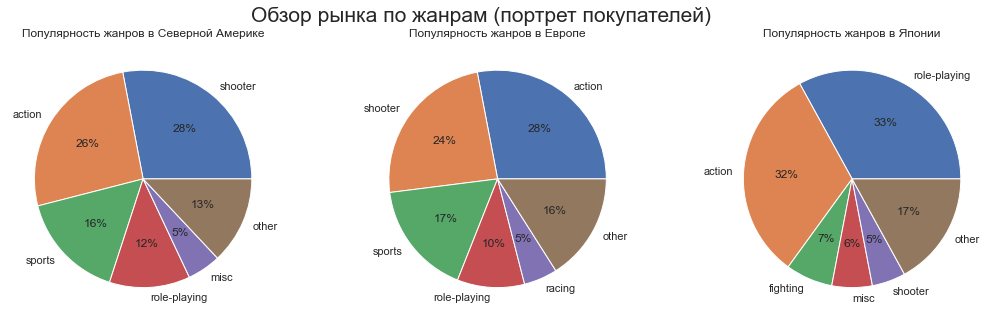

In [78]:
# Изобразим на графике

fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Обзор рынка по жанрам (портрет покупателей)', fontsize=21)
axes[0].pie(data=df_na_genre, x='ratio', labels = 'genre', autopct='%.0f%%')
axes[1].pie(data=df_eu_genre, x='ratio', labels = 'genre',  autopct='%.0f%%')
axes[2].pie(data=df_jp_genre, x='ratio', labels = 'genre',  autopct='%.0f%%')
axes[0].set_title('Популярность жанров в Северной Америке')
axes[1].set_title('Популярность жанров в Европе')
axes[2].set_title('Популярность жанров в Японии')
plt.show()

### Продажи по рейтингу ESRB <a id='19'></a>

In [79]:
# Продажи по рейтингу ESRB в NA 

df_na_rating = df_na.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_na_rating['ratio'] = round(df_na_rating['na_sales'] / df_na_rating['na_sales'].sum(), 2)

df_na_rating

,rating,na_sales,ratio
0,m,96.42,0.34
1,w/o_rating,64.72,0.23
2,e,50.74,0.18
3,t,38.95,0.14
4,e10+,33.23,0.12


In [80]:
# Продажи по рейтингу ESRB в EU

df_eu_rating = df_eu.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_eu_rating['ratio'] = round(df_eu_rating['eu_sales'] / df_eu_rating['eu_sales'].sum(), 2)

df_eu_rating

,rating,eu_sales,ratio
0,m,93.44,0.35
1,w/o_rating,58.95,0.22
2,e,58.06,0.21
3,t,34.07,0.13
4,e10+,26.16,0.10


In [81]:
# Продажи по рейтингу ESRB в JP

df_jp_rating = df_jp.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False).head(5).reset_index()

df_jp_rating['ratio'] = round(df_jp_rating['jp_sales'] / df_jp_rating['jp_sales'].sum(), 2)

df_jp_rating

,rating,jp_sales,ratio
0,w/o_rating,56.90,0.61
1,t,14.78,0.16
2,e,8.94,0.10
3,m,8.01,0.09
4,e10+,4.46,0.05


Для регионов EU и NA рейтинги совпадают: самые популярные - M (для возрослых), далее идут w/o_rating, E (для всех), T (подростковый), E10+ (для всех старше 10 лет). В JP же все иначе - w/o_rating на первом месте, далее идут T, Е, М и наименее популярен E10+. Большое количество игр без рейтинга в Японии может быть связано с тем, что большое производство собственных игр, которые не так востребоваы на Западе, где применяется система рейтинга ESRB, и своя рейтинговая система.

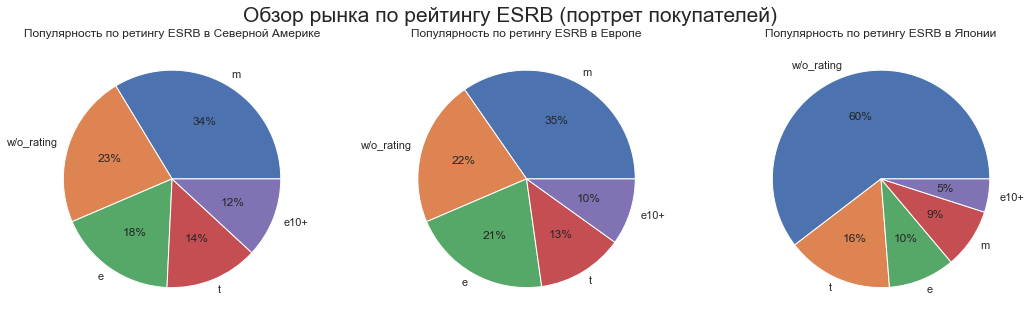

In [82]:
# Изобразим на графике

fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Обзор рынка по рейтингу ESRB (портрет покупателей)', fontsize=21)
axes[0].pie(data=df_na_rating, x='ratio', labels = 'rating', autopct='%.0f%%')
axes[1].pie(data=df_eu_rating, x='ratio', labels = 'rating',  autopct='%.0f%%')
axes[2].pie(data=df_jp_rating, x='ratio', labels = 'rating',  autopct='%.0f%%')
axes[0].set_title('Популярность по ретингу ESRB в Северной Америке')
axes[1].set_title('Популярность по ретингу ESRB в Европе')
axes[2].set_title('Популярность по ретингу ESRB в Японии')
plt.show()

Учитывая, что все топы (жанры, платформы, ESRB) в регионах NA и EU очень похожи друг с другом и разительно отличаются от JP, можно сказать, что существует большая культурная разница между западным и восточным сегментами рынка, каждый из которых требует особой стратегии.

## Проверка статистических гипотез <a id='20'></a>

Критичных выбросов в оценках пользователей нет, поэтому будем использовать t-test. Уровень значимости alpha выберем 5%.

### Гипотеза первая <a id='21'></a>

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [83]:
# Создадим датафрейем с необходимыми платформами, исключив оценку 0

df_test_1 = (df_final[['name','platform','genre','user_score']]
             .query('(platform == "xone" or platform == "pc") and user_score != 0')
             .dropna(subset=['user_score']))

df_test_1.head(5)

,name,platform,genre,user_score
165,grand theft auto v,xone,action,7.9
179,call of duty: advanced warfare,xone,shooter,5.4
242,halo 5: guardians,xone,shooter,6.4
270,fallout 4,xone,role-playing,6.2
373,assassin's creed: unity,xone,action,4.1


In [84]:
# Посчитаем стать. значимость для первой гипотезы с помощью t-test

xone = df_test_1[df_test_1['platform'] == 'xone']['user_score']

pc = df_test_1[df_test_1['platform'] == 'pc']['user_score']

alpha = 0.05

results = st.ttest_ind(xone, pc)

print('Средний пользовательский рейтинг платформы PC:', pc.mean())
print('Количество строк с платформой PC:', pc.count())
print('Средний пользовательский рейтинг платформы XOne:', xone.mean())
print('Количество строк с платформой XOne:', xone.count())

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы PC: 6.298361
Количество строк с платформой PC: 122
Средний пользовательский рейтинг платформы XOne: 6.5945444
Количество строк с платформой XOne: 165
p-value: 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


p-value недостаточно низкий, чтобы отклонить нулевую гипотезу. Поэтому принимаем гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Гипотеза вторая <a id='22'></a>

H0: Средние пользовательские рейтинги жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [85]:
# Создадим датафрейем с необходимыми жанрами, исключив оценки и 0

df_test_2 = (df_final[['name','platform','genre','user_score']]
             .query('(genre == "action" or genre == "sports") and user_score != 0')
             .dropna(subset=['user_score']))

df_test_2.head(5)

,name,platform,genre,user_score
42,grand theft auto v,ps4,action,8.3
77,fifa 16,ps4,sports,4.3
94,fifa 17,ps4,sports,5.0
143,fifa 15,ps4,sports,5.7
165,grand theft auto v,xone,action,7.9


In [86]:
# Посчитаем стать. значимость для второй гипотезы с помощью t-test

action = df_test_2[df_test_2['genre'] == 'action']['user_score']

sports = df_test_2[df_test_2['genre'] == 'sports']['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)

print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Количество значений с жанром Action:', action.count())
print('Средний пользовательский рейтинг жанра Sports:', sports.mean())
print('Количество значений с жанром Sports:', sports.count())

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.760606
Количество значений с жанром Action: 297
Средний пользовательский рейтинг жанра Sports: 5.225197
Количество значений с жанром Sports: 127
p-value: 1.1825638224397035e-14
Отвергаем нулевую гипотезу


p-value достаточно низкий, чтобы отклонить нулевую гипотезу. Поэтому принимаем гипотезу H1: Средние пользовательские рейтинги жанров Action и Sports различаются

## Вывод <a id='23'></a>

Для анализа был предоставлен датафрейм из открытых источников с данными об играх. Изначально в датафрейме насчитывалось 16713 строк, после предобработки их осталось 16442: общая потеря данных 1%. В датафреймы огромное количество пропусков в столбцах с оценками от критиков и пользователей, а также с рейтингом ESRB (до 50%).

Для прогнозирования продаж на 2017 предлагается взять датафрейм с данными начиная от 2014 года (всего 1689 строк): 2014 год  показывает к 2015 году снижение продаж игр при стабилизации по количеству их производства. Так как данные за 2016 год неполные, нельзя точно сказать, продолжиться ли падение продаж или стабилизируется. Наиболее резкое падение продаж показывают регионы NA и EU. 

Каждая из локаций показывает особое отношение к играм: если EU и NA очень похожи, то JP от них значительно отличается, поэтому рынки Востока и Запада требуют особого подхода.

Наиболее перспективными кажутся новые платформы PS4 и XOne, которые занимают первые месте по продажам в регионах NA и EU, а PS4 также на втором месте в JP. В JP также любят портативные приставки WiiU, PSV и 3DS (самая популярная платформа в регионе), что нельзя сказать о Западе, где в NA и EU на последних местах топ-5 представлен 3DS.

По жанрам лидируют в NA и EU Shooter и Action, в JP - Role-Playing и Action. Кроме того, Запад иакже любит Sports и Role-Playing, а Восток - Shooter и Fighting.

При исследовании взаимодействия продаж и оценок был получен вполне очевидный и логичный вывод: продаются лучше игры, имеющие высокий рейтинг у пользователей и критиков. Но нельзя забывать, что далеко не все игры, имеющие высокий рейтинг, продаются хорошо.

Относительно рейтинга ESRB выявлено, что Запад предпочитает играть в игра для взрослых или для всех, Восток - для подростков или для всех. При этом в каждом регионе огромное количество игр не имеет рейтинга. Так, в JP без рейтинга наиболее популярны, в NA и EU игры без жанра на втором месте.  


Суммирая, можно сказать, что для пользователям с Запада лучше продавать средне- и высокооцененные игры на PS4 и XOne в жанрах Action, Shooter и Sports, рейтингом M и Е, если рейтинг известен. Для пользователей с востока - на 3DS и PS4, а также портативные носители с рейтингом T, Е, M (если рейтинги известны) в жанрах Action и Role-Playing.

Также была проведена статистическая оценка двух гипотез:
1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". По результату t-test нет статистических оснований говорить, что пользовательские рейтинги для платформ Xbox One и PC разные, поэтому примем гипотезу H0.
2. "Средние пользовательские рейтинги жанров Action и Sports одинаковые". По результату t-test есть статистические основания говорить, что пользовательские рейтинги жанров Action и Sports различаются - Action имеет более высокие оценки.